In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

# Display the first few rows of the dataset
print(df.head())

# Inspect the structure of the dataset
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   User_ID  Age  Gender Location     Subscription_Start_Date  \
0        1   56   Other  Central  2020-06-07 01:53:37.656934   
1        2   69   Other     West  2024-02-21 01:53:37.656980   
2        3   46  Female    North  2022-10-06 01:53:37.656995   
3        4   32  Female     East  2022-01-04 01:53:37.657006   
4        5   60  Female    North  2020-03-13 01:53:37.657017   

  Subscription_Type  Monthly_Payment Payment_Method  Monthly_Hours_Watched  \
0           Premium            19.99    Credit Card              31.513153   
1          Standard            14.99    Credit Card               4.982277   
2          Standard            14.99         PayPal               4.114953   
3          Standard            14.99    Credit Card              60.244820   
4          Standard            14.99    Credit Card               4.711855   

  Favorite_Genre Devices_Used  Average_Session_Length  Content_ID  \
0         Action           PC                1.195762        1023   
1       

In [ ]:
# It seems like these missing values are likely from users who have not churned yet, which is normal.

In [5]:
# Check for obvious outliers in numerical columns
numerical_columns = ['Age', 'Monthly_Payment', 'Monthly_Hours_Watched', 'Average_Session_Length', 'Rating_Given']
df[numerical_columns].describe()


,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Rating_Given
count,806.000000,806.000000,806.000000,806.000000,806.000000
mean,44.260546,14.555757,19.339952,1.880612,3.038462
std,15.259791,3.389427,19.641542,1.846948,1.444548
min,18.000000,9.990000,0.041574,0.000821,1.000000
25%,32.000000,9.990000,5.788356,0.575072,2.000000
50%,44.000000,14.990000,13.401510,1.286001,3.000000
75%,56.750000,14.990000,26.369538,2.546404,4.000000
max,70.000000,19.990000,139.170408,11.049324,5.000000


<Axes: ylabel='Monthly_Hours_Watched'>

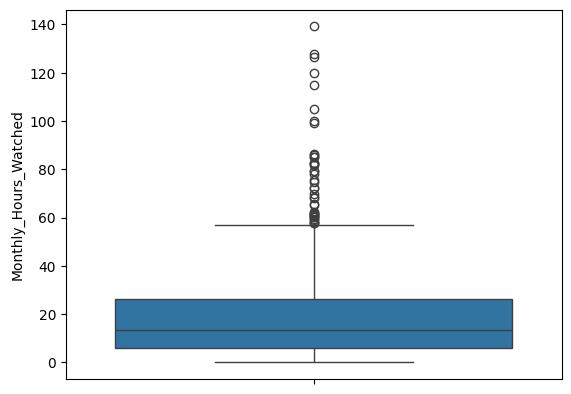

In [8]:
sns.boxplot(df['Monthly_Hours_Watched'])

<Axes: ylabel='Average_Session_Length'>

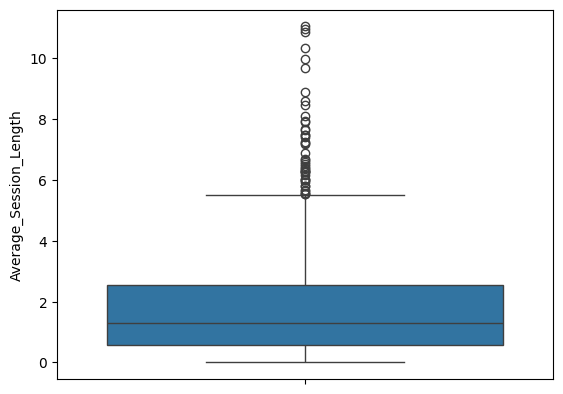

In [9]:
sns.boxplot(df['Average_Session_Length'])

<Axes: ylabel='num_watch_per_month'>

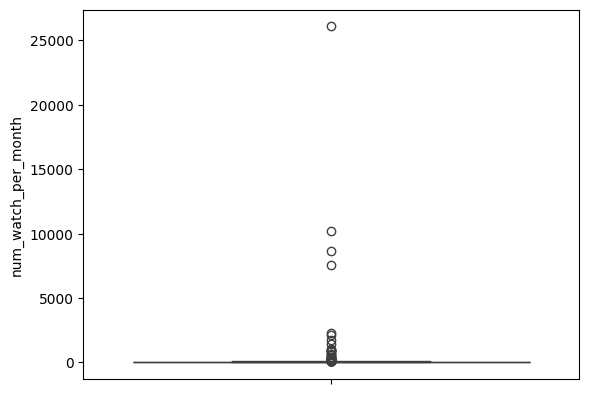

In [11]:
df['num_watch_per_month'] = df['Monthly_Hours_Watched']/ df['Average_Session_Length']
df['num_watch_per_month'].describe()
sns.boxplot(df['num_watch_per_month'])

In [15]:
# Identify significant outliers
outliers = df[df['num_watch_per_month'] > 5000]
print(f"Number of significant outliers: {len(outliers)}")

# Remove significant outliers
df_cleaned = df[df['num_watch_per_month'] <= 5000]
print(f"Shape of the cleaned dataset: {df_cleaned.shape}")

Number of significant outliers: 4
Shape of the cleaned dataset: (802, 18)


/var/folders/03/qxtr7cc92pg1c6lvx8kqq6f80000gn/T/ipykernel_1177/2392860313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date_of_Churn'] = pd.to_datetime(df_cleaned['Date_of_Churn'])
/var/folders/03/qxtr7cc92pg1c6lvx8kqq6f80000gn/T/ipykernel_1177/2392860313.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_data['Churn_Month_Year'] = churned_data['Date_of_Churn'].dt.to_period('M')


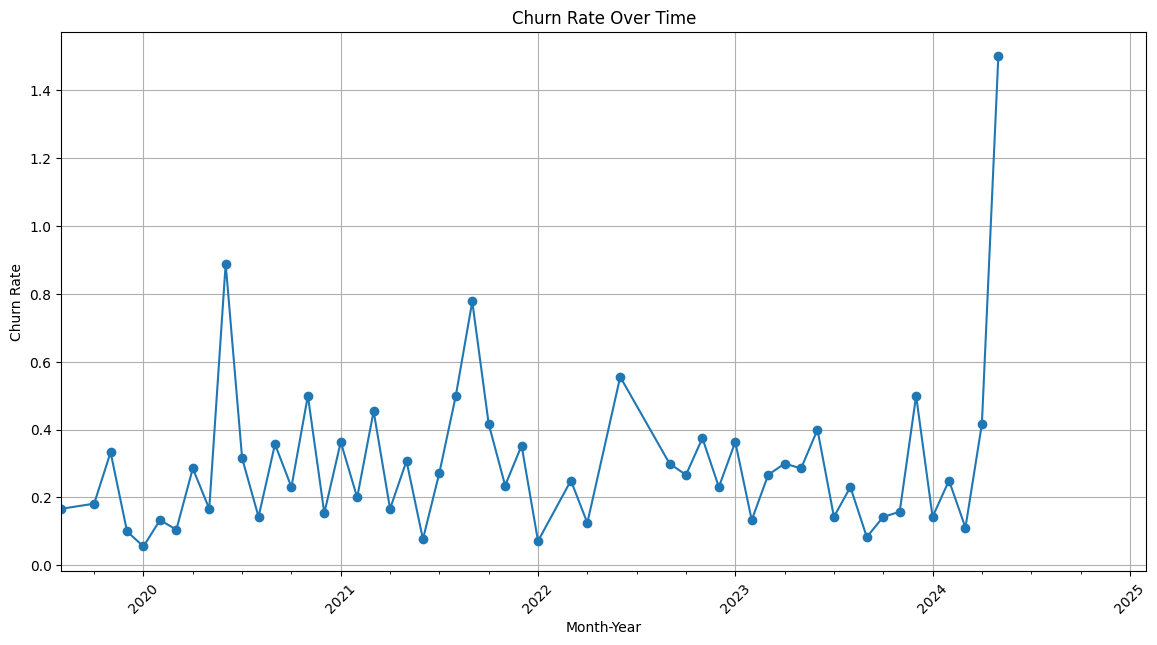

Churn_Month_Year
2025-02         inf
2025-01         inf
2024-12         inf
2024-11         inf
2024-10         inf
2024-07         inf
2024-08         inf
2024-05    1.500000
2020-06    0.888889
2021-09    0.777778
2022-06    0.555556
2020-11    0.500000
2023-12    0.500000
2021-08    0.500000
2021-03    0.454545
2021-10    0.416667
2024-04    0.416667
2023-06    0.400000
2022-11    0.375000
2023-01    0.363636
2021-01    0.363636
2020-09    0.357143
2021-12    0.352941
2019-11    0.333333
2020-07    0.315789
2021-05    0.307692
2022-09    0.300000
2023-04    0.300000
2020-04    0.285714
2023-05    0.285714
2021-07    0.272727
2022-10    0.266667
2023-03    0.266667
2024-02    0.250000
2022-03    0.250000
2021-11    0.235294
2020-10    0.230769
2022-12    0.230769
2023-08    0.230769
2021-02    0.200000
2019-10    0.181818
2019-08    0.166667
2021-04    0.166667
2020-05    0.166667
2023-11    0.157895
2020-12    0.153846
2024-01    0.142857
2020-08    0.142857
2023-07    0.142857
202

In [36]:

# Ensure the 'Date_of_Churn' column is in datetime format
df_cleaned['Date_of_Churn'] = pd.to_datetime(df_cleaned['Date_of_Churn'])

# Filter out rows where 'Date_of_Churn' is NaN (users who have not churned)
churned_data = df_cleaned.dropna(subset=['Date_of_Churn'])

# Extract the month and year from the 'Date_of_Churn' column
churned_data['Churn_Month_Year'] = churned_data['Date_of_Churn'].dt.to_period('M')

# Count the number of churns per month
monthly_churn_counts = churned_data['Churn_Month_Year'].value_counts().sort_index()

# Calculate the total number of users per month for calculating the churn rate
# Assuming the dataset contains data for all users, both churned and active
new_users_per_month = df_cleaned['Subscription_Start_Date'].dt.to_period('M').value_counts().sort_index()

# Calculate churn rate per month
churn_rate_per_month = monthly_churn_counts / new_users_per_month.reindex(monthly_churn_counts.index, fill_value=0)

# Plot the churn rate over time
plt.figure(figsize=(14, 7))
churn_rate_per_month.plot(kind='line', marker='o')
plt.title('Churn Rate Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Display the churn rate per month
print(churn_rate_per_month.sort_values(ascending=False))


<Figure size 1200x600 with 0 Axes>

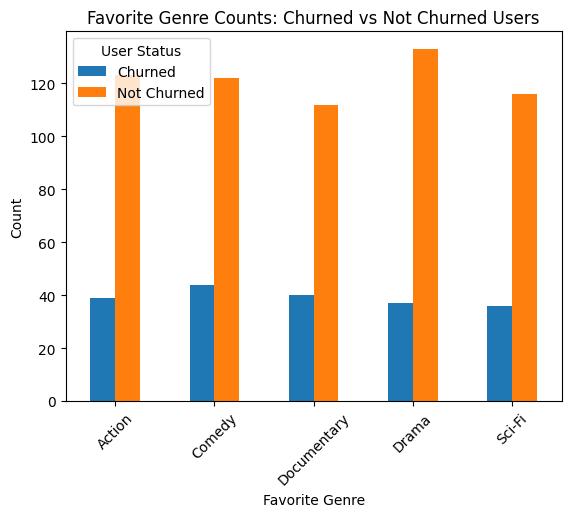

                Churned  Not Churned
Favorite_Genre                      
Action               39          123
Comedy               44          122
Documentary          40          112
Drama                37          133
Sci-Fi               36          116


In [42]:
# Separate churned and not churned users
churned_users = df_cleaned[df_cleaned['Churned'] == 1]
not_churned_users = df_cleaned[df_cleaned['Churned'] == 0]

# Count the favorite genres for churned and not churned users
churned_genre_counts = churned_users['Favorite_Genre'].value_counts()
not_churned_genre_counts = not_churned_users['Favorite_Genre'].value_counts()

# Combine the counts into a DataFrame
genre_counts = pd.DataFrame({
    'Churned': churned_genre_counts,
    'Not Churned': not_churned_genre_counts
}).fillna(0)

# Plot the relationship between favorite genre and churn status
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', stacked=False)
plt.title('Favorite Genre Counts: Churned vs Not Churned Users')
plt.xlabel('Favorite Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='User Status')
plt.show()

# Display the genre counts DataFrame
print(genre_counts)

In [44]:
# Calculate the number of churned and overall users for each favorite genre
churned_genre_counts = churned_users['Favorite_Genre'].value_counts()
overall_genre_counts = df_cleaned['Favorite_Genre'].value_counts()

# Calculate churn rate for each favorite genre
churn_rate = churned_genre_counts / overall_genre_counts

# Convert to DataFrame for better readability
churn_rate_df = churn_rate.reset_index()
churn_rate_df.columns = ['Favorite_Genre', 'Churn_Rate']

# Display the churn rate DataFrame
churn_rate_df = churn_rate_df.sort_values(by='Churn_Rate', ascending=False)
print(churn_rate_df)

  Favorite_Genre  Churn_Rate
1         Comedy    0.265060
2    Documentary    0.263158
0         Action    0.240741
4         Sci-Fi    0.236842
3          Drama    0.217647


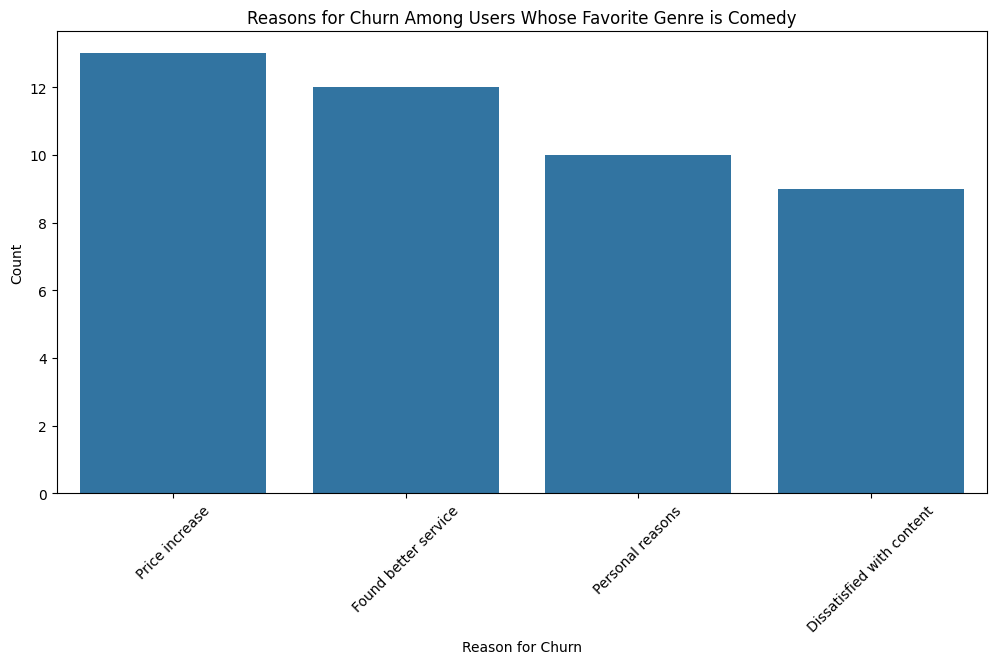

            Reason_for_Churn  Count
0             Price increase     13
1       Found better service     12
2           Personal reasons     10
3  Dissatisfied with content      9


In [50]:

# Filter the data for users who churned and whose favorite genre is Comedy
comedy_churn = df_cleaned[(df_cleaned['Churned'] == 1) & (df_cleaned['Favorite_Genre'] == 'Comedy')]

# Count the reasons for churn for these users
comedy_churn_reasons = comedy_churn['Reason_for_Churn'].value_counts().reset_index()
comedy_churn_reasons.columns = ['Reason_for_Churn', 'Count']

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(data=comedy_churn_reasons, x='Reason_for_Churn', y='Count')
plt.title('Reasons for Churn Among Users Whose Favorite Genre is Comedy')
plt.xlabel('Reason for Churn')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Display the DataFrame with reasons for churn
print(comedy_churn_reasons)


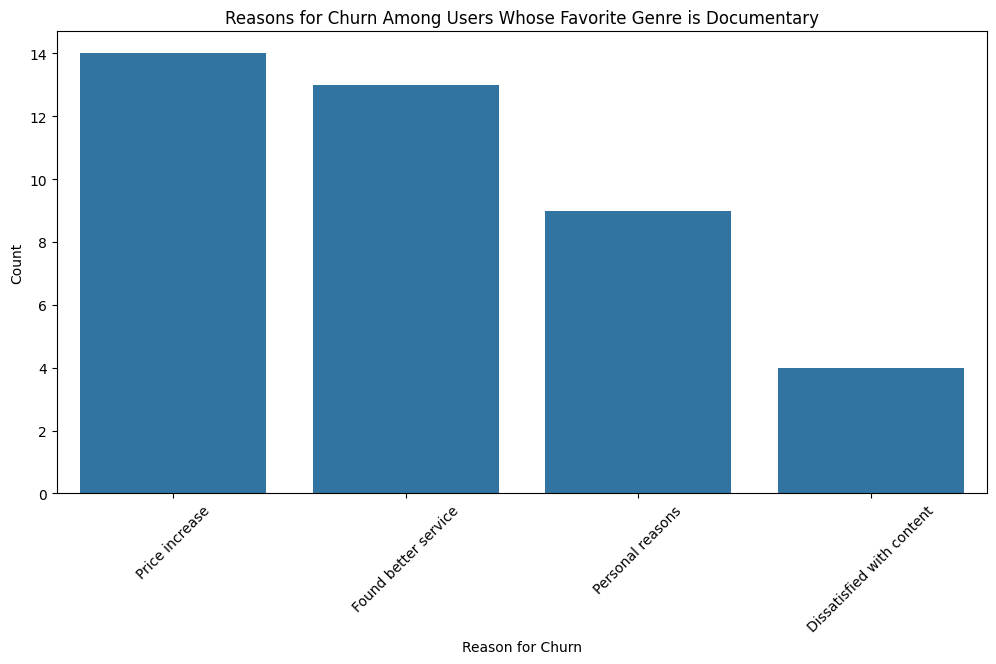

            Reason_for_Churn  Count
0             Price increase     14
1       Found better service     13
2           Personal reasons      9
3  Dissatisfied with content      4


In [58]:
# Filter the data for users who churned and whose favorite genre is Documentary
documentary_churn = df_cleaned[(df_cleaned['Churned'] == 1) & (df_cleaned['Favorite_Genre'] == 'Documentary')]

# Count the reasons for churn for these users
documentary_churn_reasons = documentary_churn['Reason_for_Churn'].value_counts().reset_index()
documentary_churn_reasons.columns = ['Reason_for_Churn', 'Count']

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(data=documentary_churn_reasons, x='Reason_for_Churn', y='Count')
plt.title('Reasons for Churn Among Users Whose Favorite Genre is Documentary')
plt.xlabel('Reason for Churn')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Display the DataFrame with reasons for churn
print(documentary_churn_reasons)

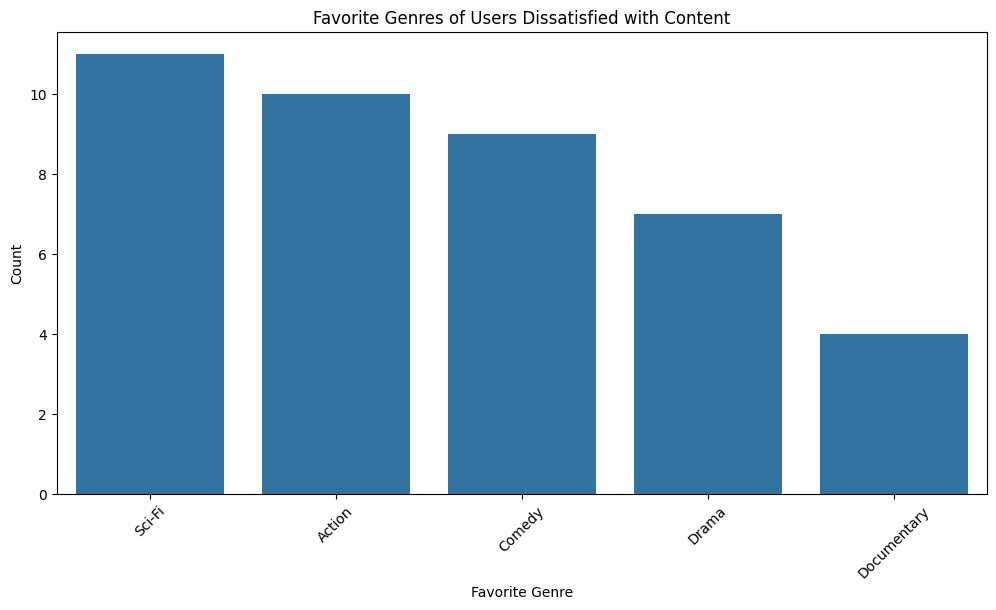

  Favorite_Genre  Count
0         Sci-Fi     11
1         Action     10
2         Comedy      9
3          Drama      7
4    Documentary      4
    Content_ID  Count
0         1009      3
1         1094      2
2         1045      2
3         1088      2
4         1061      2
5         1075      2
6         1070      1
7         1067      1
8         1053      1
9         1089      1
10        1011      1
11        1093      1
12        1007      1
13        1022      1
14        1064      1
15        1057      1
16        1050      1
17        1027      1
18        1076      1
19        1052      1
20        1044      1
21        1086      1
22        1005      1
23        1034      1
24        1040      1
25        1069      1
26        1087      1
27        1004      1
28        1084      1
29        1066      1
30        1096      1
31        1056      1
32        1010      1
33        1030      1


In [45]:


# Filter the data for users who churned due to "Dissatisfied with content"
dissatisfied_churn = df_cleaned[df_cleaned['Reason_for_Churn'] == 'Dissatisfied with content']

# Count the favorite genres and content IDs for these users
dissatisfied_genre_counts = dissatisfied_churn['Favorite_Genre'].value_counts()
dissatisfied_content_counts = dissatisfied_churn['Content_ID'].value_counts()

# Convert to DataFrame for better readability
dissatisfied_genre_df = dissatisfied_genre_counts.reset_index()
dissatisfied_genre_df.columns = ['Favorite_Genre', 'Count']

dissatisfied_content_df = dissatisfied_content_counts.reset_index()
dissatisfied_content_df.columns = ['Content_ID', 'Count']

# Visualize the results
# Plot favorite genres
plt.figure(figsize=(12, 6))
sns.barplot(data=dissatisfied_genre_df, x='Favorite_Genre', y='Count')
plt.title('Favorite Genres of Users Dissatisfied with Content')
plt.xlabel('Favorite Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Display the DataFrames
print(dissatisfied_genre_df)
print(dissatisfied_content_df)


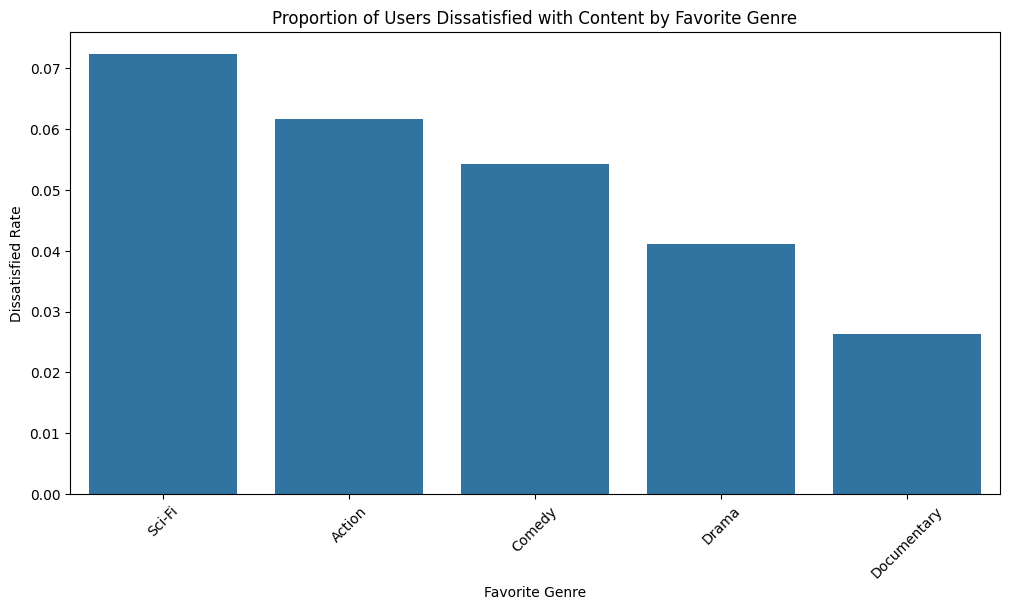

  Favorite_Genre  Dissatisfied_Count  Overall_Count  Dissatisfied_Rate
0         Sci-Fi                  11            152           0.072368
1         Action                  10            162           0.061728
2         Comedy                   9            166           0.054217
3          Drama                   7            170           0.041176
4    Documentary                   4            152           0.026316


In [49]:
# Calculate the number of users for each favorite genre
overall_genre_counts = df_cleaned['Favorite_Genre'].value_counts()

# Merge dissatisfied genre counts with overall genre counts
dissatisfied_genre_df = dissatisfied_genre_df.merge(overall_genre_counts.reset_index(), on='Favorite_Genre')
dissatisfied_genre_df.columns = ['Favorite_Genre', 'Dissatisfied_Count', 'Overall_Count']

# Calculate the proportion of dissatisfied users for each genre
dissatisfied_genre_df['Dissatisfied_Rate'] = dissatisfied_genre_df['Dissatisfied_Count'] / dissatisfied_genre_df['Overall_Count']

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(data=dissatisfied_genre_df, x='Favorite_Genre', y='Dissatisfied_Rate')
plt.title('Proportion of Users Dissatisfied with Content by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Dissatisfied Rate')
plt.xticks(rotation=45)
plt.show()

# Display the DataFrame with dissatisfaction rates
print(dissatisfied_genre_df)


In [19]:

# Filter churned users
churned_users = df[df['Churned'] == 1]

# Analyze reasons for churn
churn_reasons = churned_users['Reason_for_Churn'].value_counts()

# Display the results
churn_reasons

Reason_for_Churn
Price increase               53
Personal reasons             52
Found better service         51
Dissatisfied with content    41
Name: count, dtype: int64

/var/folders/03/qxtr7cc92pg1c6lvx8kqq6f80000gn/T/ipykernel_1177/2381630833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Subscription_Start_Date'] = pd.to_datetime(df_cleaned['Subscription_Start_Date'])
/var/folders/03/qxtr7cc92pg1c6lvx8kqq6f80000gn/T/ipykernel_1177/2381630833.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date_of_Churn'] = pd.to_datetime(df_cleaned['Date_of_Churn'])
/var/folders/03/qxtr7cc92pg1c6lvx8kqq6f80000gn/T/ipykernel_1177/2381630833.py:10: SettingW

Churned Users Days of Use Statistics:
count    196.000000
mean     195.739796
std       95.987866
min       30.000000
25%      115.000000
50%      201.000000
75%      277.250000
max      364.000000
Name: Days_of_Use, dtype: float64
Not Churned Users Days of Use Statistics:
count     606.000000
mean      993.693069
std       539.338589
min        22.000000
25%       522.000000
50%      1015.000000
75%      1478.500000
max      1845.000000
Name: Days_of_Use, dtype: float64


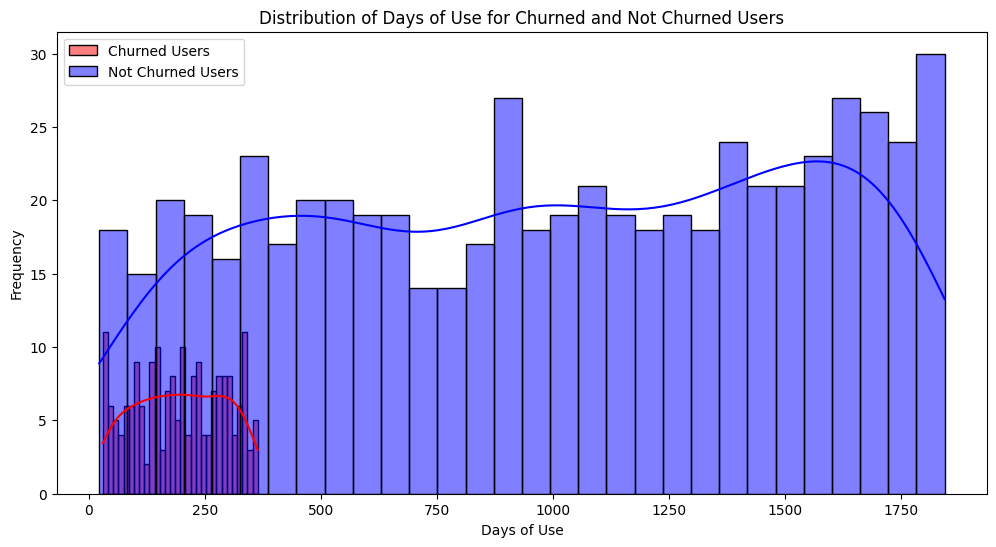

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Subscription_Start_Date and Date_of_Churn to datetime format
df_cleaned['Subscription_Start_Date'] = pd.to_datetime(df_cleaned['Subscription_Start_Date'])
df_cleaned['Date_of_Churn'] = pd.to_datetime(df_cleaned['Date_of_Churn'])

# Calculate the days of use for churned users
df_cleaned['Days_of_Use'] = (df_cleaned['Date_of_Churn'] - df_cleaned['Subscription_Start_Date']).dt.days

# For users who have not churned, calculate days of use up to the current date
current_date = pd.to_datetime('today')
df_cleaned['Days_of_Use'].fillna((current_date - df_cleaned['Subscription_Start_Date']).dt.days, inplace=True)

# Separate churned and not churned users
churned_users = df_cleaned[df_cleaned['Churned'] == 1]
not_churned_users = df_cleaned[df_cleaned['Churned'] == 0]

# Describe the days of use for churned users
days_of_use_churned_stats = churned_users['Days_of_Use'].describe()
print("Churned Users Days of Use Statistics:")
print(days_of_use_churned_stats)

# Describe the days of use for not churned users
days_of_use_not_churned_stats = not_churned_users['Days_of_Use'].describe()
print("Not Churned Users Days of Use Statistics:")
print(days_of_use_not_churned_stats)

# Plot the distribution of days of use for both churned and not churned users
plt.figure(figsize=(12, 6))
sns.histplot(churned_users['Days_of_Use'], bins=30, kde=True, color='red', label='Churned Users')
sns.histplot(not_churned_users['Days_of_Use'], bins=30, kde=True, color='blue', label='Not Churned Users')
plt.title('Distribution of Days of Use for Churned and Not Churned Users')
plt.xlabel('Days of Use')
plt.ylabel('Frequency')
plt.legend()
plt.show()
